In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv('df_year_sin_cos.csv')
df

,jurisdiction,collection_date,number_hospitals_reporting_today,total_hospitals,admissions_all_covid_confirmed,admissions_70_covid_confirmed,admissions_30_49_covid_confirmed,admissions_50_69_covid_confirmed,admissions_50_59_covid_confirmed,admissions_30_39_covid_confirmed,...,day_of_week_sin,day_of_week_cos,season,is_weekend,jurisdiction_target_encoded,proportion_inpatient_beds,proportion_prevalent_inpatient_beds,proportion_inpatient_beds_covid_vs_normal,year_sin,year_cos
0,CA,01-08-2020,285.0,371.0,559.0,156.0,122.0,218.0,110.0,49.0,...,-0.974928,-0.222521,2,1,514.416005,0.010946,0.099199,0.142395,-7.052975e-14,1.000000
1,CA,02-08-2020,352.0,371.0,654.0,193.0,137.0,252.0,125.0,55.0,...,-0.781831,0.623490,2,1,514.416005,0.012353,0.104815,0.148123,-7.052975e-14,1.000000
2,CA,03-08-2020,355.0,371.0,692.0,215.0,162.0,256.0,115.0,52.0,...,0.000000,1.000000,2,0,514.416005,0.011872,0.104653,0.151046,-7.052975e-14,1.000000
3,CA,04-08-2020,355.0,371.0,676.0,208.0,171.0,246.0,114.0,64.0,...,0.781831,0.623490,2,0,514.416005,0.011996,0.100387,0.143154,-7.052975e-14,1.000000
4,CA,05-08-2020,355.0,371.0,691.0,224.0,152.0,244.0,108.0,55.0,...,0.974928,-0.222521,2,0,514.416005,0.011667,0.100459,0.139419,-7.052975e-14,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,CA,13-02-2024,340.0,371.0,295.0,155.0,41.0,79.0,31.0,22.0,...,0.781831,0.623490,4,0,514.416005,0.004914,0.025137,0.031930,-9.510565e-01,0.309017
1292,CA,14-02-2024,338.0,371.0,272.0,140.0,26.0,72.0,22.0,13.0,...,0.974928,-0.222521,4,0,514.416005,0.004514,0.024544,0.030878,-9.510565e-01,0.309017
1293,CA,15-02-2024,335.0,371.0,271.0,143.0,24.0,81.0,25.0,13.0,...,0.433884,-0.900969,4,0,514.416005,0.004517,0.024570,0.030928,-9.510565e-01,0.309017
1294,CA,16-02-2024,334.0,371.0,297.0,159.0,48.0,59.0,21.0,27.0,...,-0.433884,-0.900969,4,0,514.416005,0.004951,0.025141,0.031849,-9.510565e-01,0.309017


In [8]:
print(df.columns.to_list())

['jurisdiction', 'collection_date', 'number_hospitals_reporting_today', 'total_hospitals', 'admissions_all_covid_confirmed', 'admissions_70_covid_confirmed', 'admissions_30_49_covid_confirmed', 'admissions_50_69_covid_confirmed', 'admissions_50_59_covid_confirmed', 'admissions_30_39_covid_confirmed', 'admissions_40_49_covid_confirmed', 'admissions_18_29_covid_confirmed', 'admissions_20_29_covid_confirmed', 'admissions_0_17_covid_confirmed', 'average_admissions_all_covid_confirmed', 'average_admissions_18_29_covid_confirmed', 'average_admissions_40_49_covid_confirmed', 'average_admissions_60_69_covid_confirmed', 'average_admissions_30_39_covid_confirmed', 'average_admissions_30_49_covid_confirmed', 'average_admissions_50_69_covid_confirmed', 'average_admissions_20_29_covid_confirmed', 'average_admissions_0_17_covid_confirmed', 'average_admissions_70_covid_confirmed', 'average_admissions_50_59_covid_confirmed', 'admissions_60_69_covid_confirmed', 'average_admissions_60_69_covid_confirmed

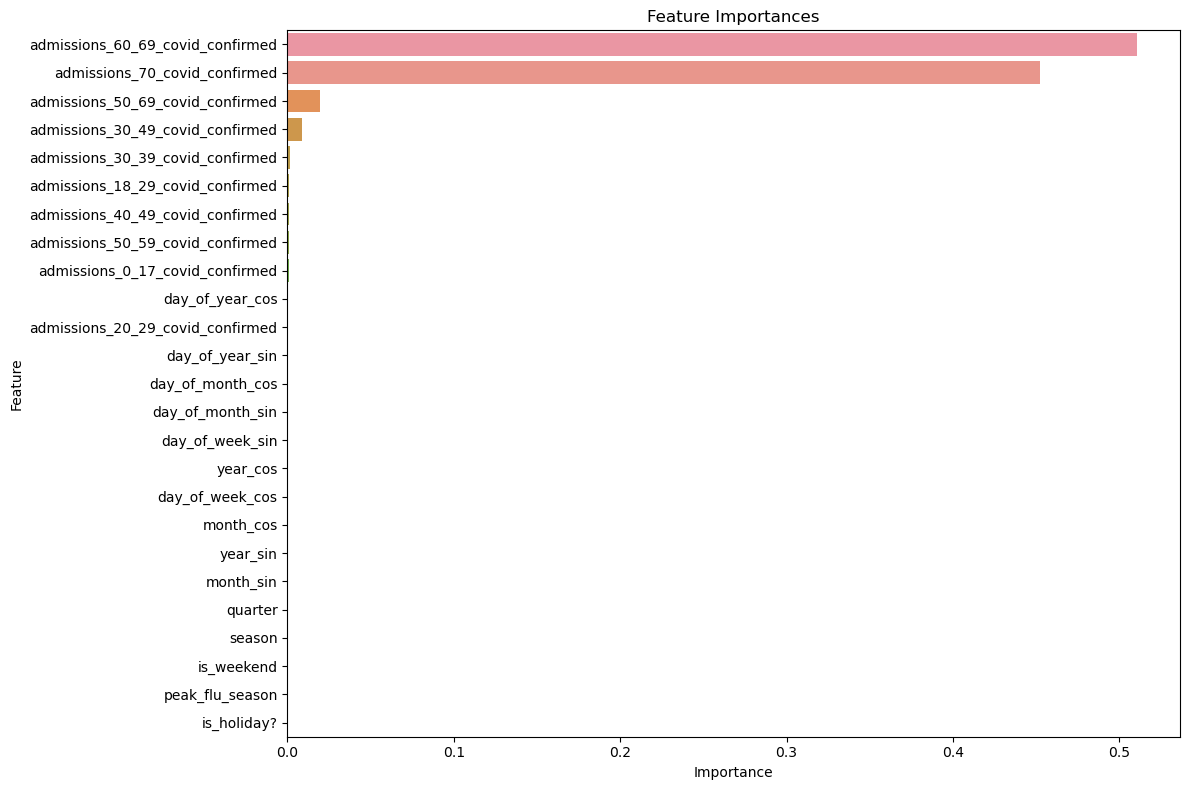

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (assuming the data is in a DataFrame called df)
# df = pd.read_csv('your_dataset.csv')  # Uncomment and modify to load your dataset

# Assuming df is already defined and loaded with data
# Define features and target
features = ['admissions_70_covid_confirmed', 'admissions_30_49_covid_confirmed', 'admissions_50_69_covid_confirmed',
            'admissions_50_59_covid_confirmed', 'admissions_30_39_covid_confirmed', 'admissions_40_49_covid_confirmed',
            'admissions_18_29_covid_confirmed', 'admissions_20_29_covid_confirmed', 'admissions_0_17_covid_confirmed',
            'admissions_60_69_covid_confirmed', 'peak_flu_season', 'is_holiday?', 'day_of_year_sin', 'day_of_year_cos',
            'month_sin', 'month_cos', 'day_of_month_sin', 'day_of_month_cos', 'day_of_week_sin', 'day_of_week_cos',
            'season', 'is_weekend', 'year_sin', 'year_cos', 'quarter']
target = 'admissions_all_covid_confirmed'

X = df[features]
y = df[target]

# Initialize Random Forest model
rf = RandomForestRegressor()

# Cross-validation setup
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Calculate feature importances
feature_importances = np.zeros(len(features))

for train_idx, test_idx in cv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    rf.fit(X_train, y_train)
    feature_importances += rf.feature_importances_

# Average the feature importances
feature_importances /= cv.get_n_splits()

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.tight_layout()

# Save the plot as a PDF file
#plt.savefig('feature_importances.pdf')
plt.show()
